In [205]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import textwrap

In [172]:
ticker = 'AXP'
START_DATE = '2020-06-30'
END_DATE = '2023-03-31'

In [235]:
x = yf.download(ticker, start=START_DATE, end=END_DATE)
x

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,94.160004,95.599998,93.570000,95.199997,91.436958,4367100
2020-07-01,95.250000,96.959999,93.639999,94.050003,90.742302,3301000
2020-07-02,96.769997,97.290001,93.849998,94.330002,91.012459,4239700
2020-07-06,96.510002,97.900002,95.839996,96.580002,93.183311,4059600
2020-07-07,95.440002,95.519997,92.629997,93.010002,89.738876,5564200
...,...,...,...,...,...,...
2023-03-24,160.520004,160.710007,157.820007,159.779999,159.190262,2588700
2023-03-27,163.949997,164.470001,161.830002,163.119995,162.517929,3984300
2023-03-28,162.210007,162.589996,158.190002,159.210007,158.622375,4883700


In [236]:
adj_close = x['Adj Close']
returns = adj_close.pct_change().dropna()
returns

Date
2020-07-01   -0.007597
2020-07-02    0.002977
2020-07-06    0.023852
2020-07-07   -0.036964
2020-07-08   -0.001183
                ...   
2023-03-24   -0.018309
2023-03-27    0.020904
2023-03-28   -0.023970
2023-03-29    0.027511
2023-03-30   -0.007213
Name: Adj Close, Length: 692, dtype: float64

In [175]:
train = returns['2020-06-30':'2022-08-31']
test = returns['2022-09-01':'2023-03-31']

In [240]:
train

Date
2020-07-01   -0.007597
2020-07-02    0.002977
2020-07-06    0.023852
2020-07-07   -0.036964
2020-07-08   -0.001183
                ...   
2022-08-25    0.019481
2022-08-26   -0.030327
2022-08-29   -0.017609
2022-08-30    0.000777
2022-08-31   -0.017199
Name: Adj Close, Length: 547, dtype: float64

In [241]:
test

Date
2022-09-01   -0.005855
2022-09-02   -0.008735
2022-09-06   -0.007944
2022-09-07    0.024562
2022-09-08    0.008342
                ...   
2023-03-24   -0.018309
2023-03-27    0.020904
2023-03-28   -0.023970
2023-03-29    0.027511
2023-03-30   -0.007213
Name: Adj Close, Length: 145, dtype: float64

In [176]:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1]]
N_SIM = 100
mu = train.mean()
sigma = train.std()

In [177]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
   dt = T/N
   dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
   W = np.cumsum(dW, axis=1)
   time_step = np.linspace(dt, T, N)
   time_steps = np.broadcast_to(time_step, (n_sims, N))
   S_t = (
      s_0 * np.exp((mu - 0.5 * sigma ** 2) * time_steps + sigma * W)
   )
   S_t = np.insert(S_t, 0, s_0, axis=1)
   return S_t

In [237]:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)
gbm_simulations

array([[150.34196472, 154.76321658, 151.12853787, ..., 236.18569433,
        234.24047906, 237.3307999 ],
       [150.34196472, 147.52157795, 145.3114898 , ..., 117.20896843,
        120.17802698, 121.00920977],
       [150.34196472, 156.99216535, 157.34916704, ..., 168.07979776,
        169.38453879, 171.75968228],
       ...,
       [150.34196472, 152.45434467, 156.79752442, ..., 156.49123088,
        158.42626642, 164.4989463 ],
       [150.34196472, 152.42169312, 156.7219208 , ..., 297.16645669,
        313.68934913, 309.03819645],
       [150.34196472, 149.41598666, 146.13194729, ..., 220.93590408,
        218.17109709, 216.00326966]])

In [228]:
# prepare objects for plotting
LAST_TRAIN_DATE = train.index[-1].date()
FIRST_TEST_DATE = test.index[0].date()
LAST_TEST_DATE = test.index[-1].date()
PLOT_TITLE = (f'{ticker} Simulation 'f'({FIRST_TEST_DATE} to {LAST_TEST_DATE})')

In [ ]:
selected_indices = adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE].index
index = [date.date() for date in selected_indices]

In [239]:
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=index)
gbm_simulations_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2022-08-31,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,...,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965,150.341965
2022-09-01,154.763217,147.521578,156.992165,146.739621,153.023072,151.953956,149.846143,150.202761,160.036284,155.670578,...,148.109709,153.512423,151.038066,153.060091,151.886448,152.768513,149.039417,152.454345,152.421693,149.415987
2022-09-02,151.128538,145.311490,157.349167,149.108887,151.347017,160.543135,149.695293,145.554748,160.915165,155.109093,...,144.500950,156.079809,147.074570,159.246854,152.572022,150.675151,146.832303,156.797524,156.721921,146.131947
2022-09-06,151.679058,142.343929,161.079359,148.572022,153.565277,157.932373,153.788233,141.103344,166.721880,151.666487,...,147.403270,158.288164,147.635628,155.112557,158.175803,149.036750,140.544631,155.776112,157.377849,149.045717
2022-09-07,157.333182,139.977083,157.859698,151.986557,154.323134,156.113826,150.779598,138.070152,169.331343,156.321001,...,147.635006,157.411883,147.659390,155.425786,156.154459,146.521740,138.501235,156.582899,157.886993,146.522201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,230.429782,114.871193,164.452379,166.892270,155.807240,119.281325,162.137683,146.436949,217.615806,120.694935,...,134.382922,154.045303,130.828194,213.545160,330.187692,130.925214,262.236289,153.168816,284.203196,216.395984
2023-03-27,232.027010,116.702423,166.963089,161.658938,157.258039,117.527847,159.385762,146.485486,214.365276,116.868672,...,132.272381,153.469354,126.893628,211.173222,323.717766,135.327034,260.782466,152.850566,292.080482,219.720489
2023-03-28,236.185694,117.208968,168.079798,153.834729,153.985237,117.710631,156.706868,143.553656,219.775580,117.891588,...,130.107921,154.230100,124.972329,207.480788,309.715829,136.380258,261.023066,156.491231,297.166457,220.935904
2023-03-29,234.240479,120.178027,169.384539,151.916154,154.735883,118.158177,156.261988,147.389813,226.665022,121.245677,...,131.997274,152.499872,123.675771,206.150129,311.435783,136.612975,270.653118,158.426266,313.689349,218.171097


In [230]:
V1_sim_mean = gbm_simulations_df.iloc[-1,0:].mean()
V1_sim_mean

168.99253732177115

In [231]:
V1_axp = adj_close.iloc[-1]
V1_axp

161.81056213378906

In [232]:
#Discount or premium % = ((Actual Price - Simulated Price) / Actual Price) * 100
percent_discount_or_premium = ((V1_axp-V1_sim_mean)/V1_axp) * 100

if percent_discount_or_premium > 0:
    discount_or_premium = "premium"
else:
    discount_or_premium = "discount"

validation = (f'Based on the mean price, {V1_sim_mean.round(4)}, from 100 simulated price paths and its actual price, {V1_axp.round(4)}, AXP was trading at a {percent_discount_or_premium.round(4)}% {discount_or_premium} as of {END_DATE}')
print(validation)

Based on the mean price, 168.9925, from 100 simulated price paths and its actual price, 161.8106, AXP was trading at a -4.4385% discount as of 2023-03-31


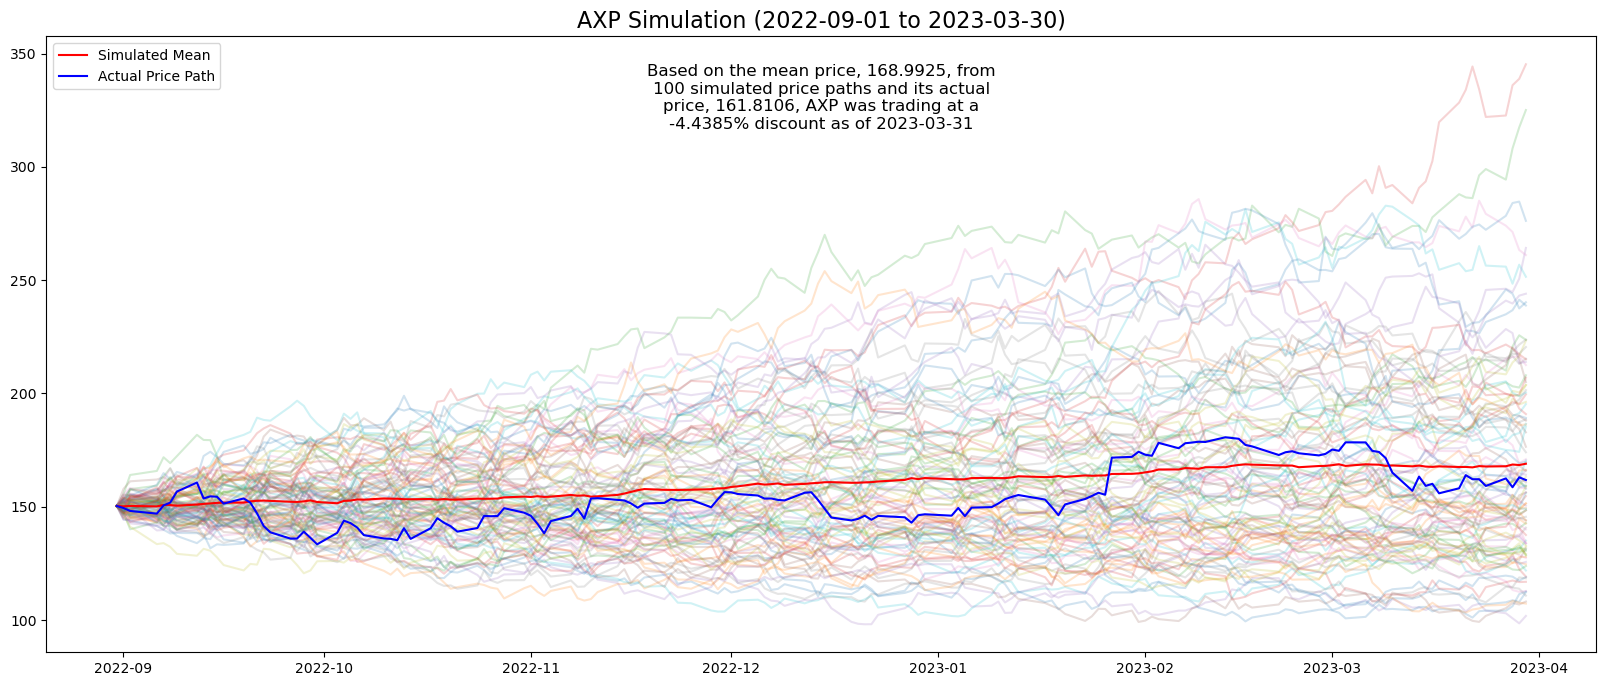

In [234]:
# plotting
ax = gbm_simulations_df.plot(figsize=(20, 8),alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), color='red')
line_2, = ax.plot(index, adj_close[LAST_TRAIN_DATE:LAST_TEST_DATE], color='blue')
ax.set_title(PLOT_TITLE, fontsize=16)
ax.legend((line_1, line_2), ('Simulated Mean', 'Actual Price Path'))
ax.text(0.5,
         0.90,
         textwrap.fill(validation, 42),
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=12)
plt.show()